<a href="https://colab.research.google.com/github/codingcat08/Logo_avatar_nb/blob/main/Logo_avatar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --quiet --upgrade accelerate
!pip install git+https://github.com/huggingface/diffusers.git@main
!pip install controlnet_hinter==0.0.5

  Cloning https://github.com/huggingface/diffusers.git (to revision main) to /tmp/pip-req-build-uki8541m
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-uki8541m
  Resolved https://github.com/huggingface/diffusers.git to commit e7db062e102ec0a299800d7e3bfb5989b950d27f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-py3-none-any.whl size=3244929 sha256=e48a9d56f10adb396fa4faaf1a2fd1ea27a81a4e034fd52b973ccad1f25e1330
  Stored in directory: /tmp/pip-ephem-wheel-cache-qncvjjz3/wheels/2f/e1/9c/c4e22972ee698b020d29ed7cc914d898247d01e302f25df1a4
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.1
    Uninstalling diffusers-0.32.1:
      Successfully uninstalled diffusers-0.32.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.5/547.5 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.9 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214818 sha256=89b3a33d974c79895725ee834961ee92b41e8ce6c5d1155094fd2edad9d96c33
  Stored in directory: /root/.cache/pip/wheels/38/83/99/2d8437cc652a01af27df5ff037a4075e95b52d67705c5f30ca
Successfully built basicsr


In [3]:
import controlnet_hinter
# Mapping for ControlNet Model path and hinter function
CONTROLNET_MAPPING = {
    "canny_edge": {
        "model_id": "lllyasviel/sd-controlnet-canny",
        "hinter": controlnet_hinter.hint_canny
    },
    "pose": {
        "model_id": "lllyasviel/sd-controlnet-openpose",
        "hinter": controlnet_hinter.hint_openpose
    },
    "depth": {
        "model_id": "lllyasviel/sd-controlnet-depth",
        "hinter": controlnet_hinter.hint_depth
    },
    "scribble": {
        "model_id": "lllyasviel/sd-controlnet-scribble",
        "hinter": controlnet_hinter.hint_scribble,
    },
    "segmentation": {
        "model_id": "lllyasviel/sd-controlnet-seg",
        "hinter": controlnet_hinter.hint_segmentation,
    },
    "normal": {
        "model_id": "lllyasviel/sd-controlnet-normal",
        "hinter": controlnet_hinter.hint_normal,
    },
    "hed": {
        "model_id": "lllyasviel/sd-controlnet-hed",
        "hinter": controlnet_hinter.hint_hed,
    },
    "hough": {
        "model_id": "lllyasviel/sd-controlnet-mlsd",
        "hinter": controlnet_hinter.hint_hough,
    }
}

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [4]:
from diffusers import DiffusionPipeline, LCMScheduler,DDIMScheduler
from diffusers import AutoPipelineForText2Image, StableDiffusionControlNetPipeline, ControlNetModel
import torch
from diffusers.utils import load_image


# pipeline loading code:

# Stable diffusion base model
base_model_path =  "digiplay/Juggernaut_final"

pipe=None
torch.cuda.empty_cache()
device = "cuda"

controlnet_type = "canny_edge"  # or other types depending on your requirement

# Loading the base model with ControlNet
controlnet = ControlNetModel.from_pretrained(CONTROLNET_MAPPING[controlnet_type]["model_id"], torch_dtype=torch.float16).to(device)
pipe = StableDiffusionControlNetPipeline.from_pretrained(base_model_path,
                                                         controlnet=controlnet,
                                                         torch_dtype=torch.float16,
                                                         ).to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/593 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/427 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


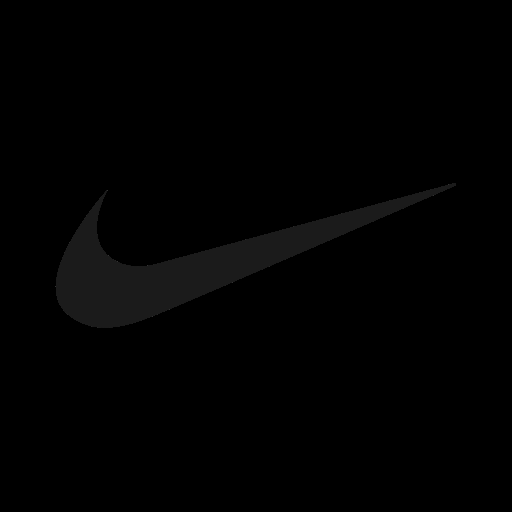

In [6]:
logo_image_url = "https://cdn4.iconfinder.com/data/icons/flat-brand-logo-2/512/nike-512.png"
logo_image = load_image(logo_image_url)
logo_image

  0%|          | 0/20 [00:00<?, ?it/s]

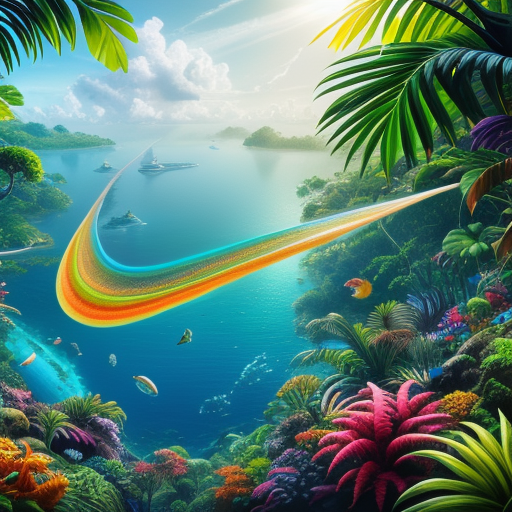

In [7]:

# @title Enter your Prompt and Run

# Describe the prompt for the logo
prompt = "Colorful, jungle surrounding, ocean , natural, detailed, hd, 4k, best quality, extremely detailed"
negative_prompt = "nsfw, longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality"


no_of_steps = 20

# how much would the prompt affect the final output.
# higher guidance scale means more preference given to the prompt.
guidace_scale = 7.0

# how much final output would follow the control image
controlnet_conditioning_scale=1.0

# convert logo image into a control image based on the model
control_image = CONTROLNET_MAPPING[controlnet_type]["hinter"](logo_image )

# run the inference,
my_images = pipe(
    prompt=prompt,
    width=512,
    height=512,
    negative_prompt=negative_prompt,
    image=control_image,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    num_inference_steps=no_of_steps,
    guidance_scale=guidace_scale,
)

# get first image from the image generations object.
first_image = my_images.images[0]

first_image